# Data Cleaning and Visualization Project

This project involved collecting datasets from various sources, cleaning and formatting them in order for them to be analyzed, and then creating visualizations with Python to gain a better understanding of the data. After the data was collected, it was scraped and cleaned, and then analyzed using a variety of methods. Finally, the data was visualized using Plotly and the visualizations were used to gain further insights into the data.

## Data Collection and Cleaning


Transfer/update the data collection and cleaning you created for Phase II below. You may include additional cleaning functions if you have extra datasets. If no changes are necessary, simply copy and paste your phase II parsing/cleaning functions.


In [2]:
import pandas as pd
import numpy as np
import requests, time, re, json
from bs4 import BeautifulSoup
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import Image
from pprint import pprint

### Web Collection #1


In [24]:
def html_parser(url_list):
    full_dict = {}
    for url in url_list:
        soup=BeautifulSoup(open(url))
        table = soup.find_all('td', {'class': ['hc_rank', 'hc_name', 'hc_value hc_selected_v']})
        adict = {}
        for i in range(0,len(table), 3):
            adict[table[i].text] = table[i+1].text , table[i+2].text
        key = url[:-5]
        full_dict[key] = adict
    return(full_dict)
    
#The website we were going to use had a forbidden error, so we downloaded the html files and implemented the beautiful soup module.

############ Function Call ############
html_parser(['KidneyDisease.html', 'Malaria.html', 'SkinCancer.html',])

{'KidneyDisease': {'1': ('Micronesia', '77.01'),
  '62': ('Grenada', '29.59'),
  '123': ('Turkmenistan', '14.39'),
  '2': ('Nicaragua', '73.96'),
  '63': ('Zambia', '29.46'),
  '124': ('Uruguay', '14.07'),
  '3': ('El Salvador', '72.90'),
  '64': ('Mali', '29.19'),
  '125': ('Chile', '13.52'),
  '4': ('Lesotho', '69.87'),
  '65': ('Maldives', '29.04'),
  '126': ('Montenegro', '13.42'),
  '5': ('Swaziland', '62.97'),
  '66': ('Libya', '28.70'),
  '127': ('United States', '13.08'),
  '6': ('Kiribati', '56.66'),
  '67': ('Mauritania', '28.66'),
  '128': ('New Guinea', '13.07'),
  '7': ('Bolivia', '55.82'),
  '68': ('Paraguay', '27.94'),
  '129': ('North Korea', '12.98'),
  '8': ('Guatemala', '55.14'),
  '69': ('Liberia', '27.80'),
  '130': ('Uzbekistan', '12.57'),
  '9': ('Suriname', '52.54'),
  '70': ('Comoros', '27.00'),
  '131': ('Georgia', '12.52'),
  '10': ('Philippines', '51.96'),
  '71': ('Timor-Leste', '26.48'),
  '132': ('Kuwait', '12.44'),
  '11': ('Saudi Arabia', '50.63'),
  '7

In [26]:
data=html_parser(['KidneyDisease.html', 'Malaria.html', 'SkinCancer.html',])
kidney_df = pd.DataFrame(data['KidneyDisease']).transpose().reset_index()
kidney_df['index'] = kidney_df['index'].astype(int)
kidney_df.sort_values(by='index', inplace=True)
kidney_df.rename(columns = {'index': 'Rank', 0: 'Country', 1: 'Rate'}, inplace=True)
kidney_df.set_index('Rank', inplace=True)
kidney_df

Country   Rate
Rank                       
1         Micronesia  77.01
2          Nicaragua  73.96
3        El Salvador  72.90
4            Lesotho  69.87
5          Swaziland  62.97
...              ...    ...
179   United Kingdom   2.86
180          Ukraine   2.72
181          Belarus   2.70
182         Slovenia   2.34
183          Finland   2.05

[183 rows x 2 columns]

In [27]:
data=html_parser(['KidneyDisease.html', 'Malaria.html', 'SkinCancer.html',])
malaria_df = pd.DataFrame(data['Malaria']).transpose().reset_index()
malaria_df['index'] = malaria_df['index'].astype(int)
malaria_df.sort_values(by='index', inplace=True)
malaria_df.rename(columns = {'index': 'Rank', 0: 'Country', 1: 'Rate'}, inplace=True)
malaria_df.set_index('Rank', inplace=True)
malaria_df

Country   Rate
Rank                       
1       Sierra Leone  61.60
2             Zambia  54.16
3      Guinea-Bissau  53.39
4            Liberia  52.62
5               Togo  52.24
...              ...    ...
179   United Kingdom   0.00
180    United States   0.00
181          Uruguay   0.00
182       Uzbekistan   0.00
183          Vanuatu   0.00

[183 rows x 2 columns]

In [5]:
data=html_parser(['KidneyDisease.html', 'Malaria.html', 'SkinCancer.html',])
cancer_df = pd.DataFrame(data['SkinCancer']).transpose().reset_index()
cancer_df['index'] = cancer_df['index'].astype(int)
cancer_df.sort_values(by='index', inplace=True)
cancer_df.rename(columns = {'index': 'Rank', 0: 'Country', 1: 'Rate'}, inplace=True)
cancer_df.set_index('Rank', inplace=True)
cancer_df

Country  Rate
Rank                    
1       New Guinea  9.28
2          Namibia  9.09
3      New Zealand  6.63
4        Australia  4.76
5             Togo  4.71
...            ...   ...
179       Sao Tome  0.00
180         Belize  0.00
181    Saint Lucia  0.00
182   Solomon Isl.  0.00
183        Vanuatu  0.00

[183 rows x 2 columns]

In [6]:
writer = pd.ExcelWriter("Diseases.xlsx")
kidney_df.to_excel(writer, sheet_name = "Kidney Disease")
malaria_df.to_excel(writer, sheet_name = "Malaria")
cancer_df.to_excel(writer, sheet_name = "Skin Cancer")
writer.save()

### Web Collection \#2


In [8]:
def extra(url):
    r=requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')  
    table=soup.find_all('tr')[2:250]
    code_dict = {}
    str_list = []
    for row in table:
        str_list.append(row.text)
    for country in str_list:
        code_dict[country[0:2].lower()] = country[2:].split(',')[0]
    return code_dict

pass

############ Function Call ############
extra('https://sustainablesources.com/resources/country-abbreviations/')

{'ac': 'Ascension Island',
 'ad': 'Andorra',
 'ae': 'United Arab Emirates',
 'af': 'Afghanistan',
 'ag': 'Antigua And Barbuda',
 'ai': 'Anguilla',
 'al': 'Albania',
 'am': 'Armenia',
 'an': 'Netherlands Antilles',
 'ao': 'Angola',
 'aq': 'Antarctica',
 'ar': 'Argentina',
 'as': 'American Samoa',
 'at': 'Austria',
 'au': 'Australia',
 'aw': 'Aruba',
 'ax': 'Åland',
 'az': 'Azerbaijan',
 'ba': 'Bosnia And Herzegovina',
 'bb': 'Barbados',
 'be': 'Belgium',
 'bd': 'Bangladesh',
 'bf': 'Burkina Faso',
 'bg': 'Bulgaria',
 'bh': 'Bahrain',
 'bi': 'Burundi',
 'bj': 'Benin',
 'bm': 'Bermuda',
 'bn': 'Brunei Darussalam',
 'bo': 'Bolivia',
 'br': 'Brazil',
 'bs': 'Bahamas',
 'bt': 'Bhutan',
 'bv': 'Bouvet Island',
 'bw': 'Botswana',
 'by': 'Belarus',
 'bz': 'Belize',
 'ca': 'Canada',
 'cc': 'Cocos (Keeling) Islands',
 'cd': 'Congo (Democratic Republic)',
 'cf': 'Central African Republic',
 'cg': 'Congo (Republic)',
 'ch': 'Switzerland',
 'ci': 'Cote D’Ivoire',
 'ck': 'Cook Islands',
 'cl': 'Chile

In [4]:
def csv_parser():
    data = pd.read_csv('worldcities.csv',on_bad_lines='skip',delimiter=';')
    data=data.drop(['Geoname ID','ASCII Name','LABEL EN','Alternate Names','Feature Class',
                    'Feature Code','Country Code 2','Admin1 Code','DIgital Elevation Model',
                    'Admin2 Code','Admin3 Code','Admin4 Code','Elevation','Timezone',
                    'Modification date',],axis=1)
    lat_long = data['Coordinates'].str.split(',', expand=True)
    data['Latitude'],data['Longitude']=lat_long.values.T
    data.drop(['Coordinates'],axis=1,inplace=True)
    data.rename(columns = {'Country name EN': 'Country'}, inplace = True)
    code_dict = extra('https://sustainablesources.com/resources/country-abbreviations/')
    for i in range(len(data)):
        if data.loc[i,'Country'] is np.nan:
            try:
                country = code_dict[data.loc[i,'Country Code'].lower()]
                data.loc[i,'Country'] = country  
            except:
                continue

    country = data['Country'].str.split(',', expand=True)
    data['Country'],data['else']=country.values.T
    countries1 = set([data.loc[i,'Country'] for i in range(len(data))] )

    kd = pd.read_excel('Diseases.xlsx', sheet_name = 'Kidney Disease')
    countries = [kd.loc[i,'Country'] for i in range(len(kd))]    

    uncommon = [data.loc[i,'Country'] for i in range(len(data)) if data.loc[i,'Country'] not in countries]
    uncommon = list(set([country for country in uncommon if not pd.isna(country)]))
    data = data.set_index('Country')
    data = data.drop(uncommon, axis=0)
    data = data.reset_index()
    data.drop('else', axis =1, inplace=True)

    count = len(set([data.loc[i,'Country'] for i in range(len(data))]))
    data[["Latitude", "Longitude"]] = data[["Latitude", "Longitude"]].apply(pd.to_numeric)
    total_pop = pd.DataFrame(data.groupby("Country")['Population'].sum()).reset_index()
    avg_lat = pd.DataFrame(data.groupby("Country")['Latitude'].mean()).reset_index()
    avg_lon = pd.DataFrame(data.groupby("Country")['Longitude'].mean()).reset_index()

    for i in range(len(avg_lat)):
        avg_lat.loc[i,'Latitude'] = round(avg_lat.loc[i,'Latitude'] ,5)
    for i in range(len(avg_lat)):
        avg_lon.loc[i,'Longitude'] = round(avg_lon.loc[i,'Longitude'] ,5)

    new_data = total_pop.set_index('Country').join(avg_lat.set_index('Country')).join(avg_lon.set_index('Country'))
    new_data.to_csv('clean_countries.csv')

    return new_data

############ Function Call ############
csv_parser()


Population  Latitude  Longitude
Country                                     
Afghanistan     8901706  34.64512   67.56647
Albania         1670961  41.10195   20.01711
Algeria        19039658  35.44413    3.47887
Angola          4740284 -11.00478   16.07505
Argentina      36180077 -32.12683  -62.52983
...                 ...       ...        ...
Venezuela      28860220   9.39218  -68.26906
Viet Nam       32159616  16.29196  106.38777
Yemen           5126518  14.90122   45.11888
Zambia          3891743 -13.31592   28.22202
Zimbabwe        4105234 -18.56468   30.32243

[162 rows x 3 columns]

### Web Collection #3

In [8]:
with open('api_dict.json') as f:
    data_dict = json.load(f)

country_dict = {}
for country,nested in data_dict.items():
    country_dict[country] = {}
    if nested == {"reason": "Invalid timezone", "error": True}:
        continue
    else:
        for key in nested['daily']:
            if key == 'time':
                continue
            else:
                country_dict[country][key] = round(sum(nested['daily'][key])/178,2)


with open('avg_api.json', 'w') as f:
    json.dump(country_dict, f)


pprint(country_dict)

{'Afghanistan': {'precipitation_sum': 0.73,
                 'rain_sum': 0.3,
                 'shortwave_radiation_sum': 22.33,
                 'temperature_2m_max': 6.4,
                 'temperature_2m_min': -0.67,
                 'weathercode': 14.19},
 'Albania': {'precipitation_sum': 2.29,
             'rain_sum': 0.49,
             'shortwave_radiation_sum': 17.33,
             'temperature_2m_max': 27.56,
             'temperature_2m_min': 15.87,
             'weathercode': 26.46},
 'Algeria': {'precipitation_sum': 0.42,
             'rain_sum': 0.05,
             'shortwave_radiation_sum': 20.87,
             'temperature_2m_max': 30.02,
             'temperature_2m_min': 18.28,
             'weathercode': 13.17},
 'Angola': {'precipitation_sum': 1.56,
            'rain_sum': 0.02,
            'shortwave_radiation_sum': 21.1,
            'temperature_2m_max': 26.04,
            'temperature_2m_min': 12.43,
            'weathercode': 38.81},
 'Argentina': {'precipitation_sum'

### Data Sources

Sources to our datasets. 

*   Web Collection #1 Source (HTML): https://www.worldlifeexpectancy.com/world-health-rankings 
*   Web Collection #2 Source (CSV): https://public.opendatasoft.com/explore/dataset/geonames-all-cities-with-a-population-1000/export/?disjunctive.cou_name_en&sort=name
*   Web Collection #3 Source (API): https://api.open-meteo.com/v1/forecast?latitude={latitudue}&longitude={longitude}&daily=weathercode,temperature_2m_max,temperature_2m_min,precipitation_sum,rain_sum,shortwave_radiation_sum&timezone=auto&past_days=92
*   Extra Web Collection Source (HTML): https://sustainablesources.com/resources/country-abbreviations/


## Data Analysis

### Insights

#### Insight 1 Explanation

For the first insight, we wanted to check which countries have the highest short-wave radiation and highest skin cancer rates to check if there is a correlation between these two variables. For the code, we first read the 'avg_api.json', and the skin cancer sheet from the 'Diseases.xlsx' excel file. Then, we created separate lists of the countries with the ten highest shortwave radiation sum and the highest skin cancer rates. Finally, we compared the two lists to find which countries have both high shortwave radiation sum and high skin cancer rates. The overlapping countries between these lists were Malawi and Namibia which demonstrates that there is a correlation between countries having high shortwave radiation and skin cancer rates.


In [2]:
# Which are the ten countries with the highest shortwave radiation sum? Which are the ones with a higher 
# skin cancer rate? Do these countries overlap?  SHORTWAVE RADIATION.

def insight1():
    
    with open('avg_api.json') as f:
        data = json.load(f)
    sc = pd.read_excel('Diseases.xlsx', sheet_name = 'Skin Cancer')

    country_data = [(country, data[country]['shortwave_radiation_sum']) for country in data if data[country]!={}]
    country_data = sorted(country_data, key = lambda x: x[1], reverse = True)
    
    sc_data = [(sc.loc[i,'Country'], sc.loc[i,'Rate']) for i in range(len(sc))]
    sc_data = sorted(sc_data, key = lambda x: x[1], reverse = True)
    
    country_list = [country for country,swr in country_data][:10]
    sc_list = [country for country,sc_rate in sc_data][:10]
    
    common = []
    for country in country_list:
        if country in sc_list:
            common.append(country)
        
    print('Countries with the highest shortwave radiation sum: ' + str(sorted(country_list))+'\n')
    print('Countries with the highest skin cancer rates: ' + str(sorted(sc_list))+'\n')
    print('Countries in common: ' + str(sorted(common)))


############ Function Call ############
insight1()

Countries with the highest shortwave radiation sum: ['Bahrain', 'Comoros', 'Egypt', 'Jordan', 'Malawi', 'Mauritania', 'Namibia', 'Qatar', 'Saudi Arabia', 'Tanzania']

Countries with the highest skin cancer rates: ['Angola', 'Arab Emirates', 'Australia', 'Lebanon', 'Malawi', 'Namibia', 'New Guinea', 'New Zealand', 'Togo', 'Zimbabwe']

Countries in common: ['Malawi', 'Namibia']


#### Insight 2 Explanation

For the second insight, we wanted to check if the countries that have the highest temperatures were the same as the ones that have the least precipitation as there is a lot of debate on whether precipitation relates to lower temperatures. For this code, we loaded the avg API JSON file into the variable data and then created a list of tuples with each country, its maximum temperature, and its precipitation sum. Then we created 2 dictionaries: one with the temperatures for each country, and one with the precipitation. We turned each dictionary into a data frame and joined them together. Then, we found the difference between temperature and precipitation to see if there were major differences. When the difference column for a country shows a larger number, greater than 30, for example, it means the temperature rate is way higher than the precipitation rate, which shows that these countries have low precipitation and high temperatures.


In [3]:
# Are the countries with the highest temperature the ones with the least precipitation? 
# Which are these countries? HIGHEST TEMPERATURE AND PRECIPITATION. Api 

def insight2():
    with open('avg_api.json') as f:
        data = json.load(f)
    
    countries = [(country, data[country]['temperature_2m_max'], data[country]['precipitation_sum']) for country in data if data[country]!={}]

    
    temp = {i:tup[:2] for i,tup in enumerate(sorted(countries, key = lambda x: x[1], reverse=True))}
    prec = {i:tup[:3:2] for i,tup in enumerate(countries)}

    tempdf= pd.DataFrame(temp, index = ['Country', 'Temperature']).transpose()
    precdf = pd.DataFrame(prec, index = ['Country', 'Precipitation']).transpose()
    df = tempdf.set_index('Country').join(precdf.set_index('Country'))
    df['Difference'] = df.apply(lambda x: x['Temperature'] - x['Precipitation'], axis=1)


    return(df)

############ Function Call ############
insight2()

Temperature Precipitation  Difference
Country                                          
Qatar             38.62          0.06       38.56
Iraq              38.05          0.24       37.81
Kuwait            38.02          0.26       37.76
Mauritania        37.54          0.73       36.81
Bahrain           36.99          0.01       36.98
...                 ...           ...         ...
Tajikistan        11.01          3.85        7.16
Canada            10.67          2.16        8.51
Norway             9.16          1.67        7.49
Afghanistan         6.4          0.73        5.67
Iceland             1.0           6.4       -5.40

[161 rows x 3 columns]

#### Insight 3 Explanation

For the third insight, we wanted to check if countries near the equator, which have latitudes close to 0, are related to having higher kidney disease rates. We first read two datasets, the clean countries CSV and the kidney disease sheet from the excel file. Then we created two separate lists containing the countries near the equator and countries far from the equator respectively. We then created A third and fourth list which contains the country and its kidney disease rate for the countries in the close countries list and the countries in the far countries list. Finally, we calculated the average kidney disease rates for these countries. The results show that the average kidney disease rate for countries near the Equator is almost 32%, while for countries far from the Equator, it’s around 4%. This shows that countries located near the Equator have a higher kidney disease rate.


In [4]:
# How does living near the Equator relates to higher kidney disease rates (hence, higher disease transmission)?
# near equator = latitude close to 0

def insight3():
    df = pd.read_csv('clean_countries.csv')
    sc = pd.read_excel('Diseases.xlsx', sheet_name = 'Kidney Disease')

    
    close_countries = [df.loc[i,'Country'] for i in range(len(df)) if abs(df.loc[i,'Latitude'])<=2]
    far_countries = [df.loc[i,'Country'] for i in range(len(df)) if abs(df.loc[i,'Latitude'])>=57]
    
    kd_rates1 = [(sc.loc[i,'Country'],sc.loc[i,'Rate']) for i in range(len(sc)) if sc.loc[i,'Country'] in close_countries]
    kd_rates2 = [(sc.loc[i,'Country'],sc.loc[i,'Rate']) for i in range(len(sc)) if sc.loc[i,'Country'] in far_countries]
    
    print('Countries near the equator:                  Avg. Kidney Disease Rate: '+str(round(sum([num for country,num in kd_rates1])/len(kd_rates1),2)))
    pprint(kd_rates1)
    print('\nCountries far from the equator:              Avg. Kidney Disease Rate: '+str(round(sum([num for country,num in kd_rates2])/len(kd_rates2),2)))
    pprint(kd_rates2)
    
############ Function Call ############
insight3()

Countries near the equator:                  Avg. Kidney Disease Rate: 31.99
[('Kiribati', 56.66),
 ('Gabon', 37.95),
 ('Ecuador', 37.41),
 ('Uganda', 24.6),
 ('Kenya', 23.3),
 ('Singapore', 12.04)]

Countries far from the equator:              Avg. Kidney Disease Rate: 4.03
[('Sweden', 5.07),
 ('Estonia', 4.73),
 ('Norway', 4.28),
 ('Iceland', 4.0),
 ('Finland', 2.05)]


#### Insight 4 Explanation

For this insight, we wanted to find how many people were affected with malaria disease in each country, and subsequently the percentage by country of the total people affected with the disease. For the code, we first read the clean countries CSV and the malaria sheet from the excel file. Then, we created a dictionary in which each key is a country and each value is a tuple containing the malaria rate and population, skipping the country if the rate was zero, as this wouldn’t give us any important information. Afterward, we converted the dictionary into a list of tuples, removing all countries with nan population, and then sorted the data by malaria rate from highest to lowest. We put this into a data frame and then calculated the number of people affected by malaria in each country, and the percentage of the total affected people for each country. We found that the percentage of people affected proportionally is really high in some countries that have a lower malaria disease rate. For example, in the top 1 country with a malaria rate of 61, Sierra Leone, only 1.52% of people were affected, whereas in Nigeria, with a malaria rate of 34, 27% of people were affected.


In [5]:
# How many people are affected by Malaria Disease per country? 

def insight4():
    df = pd.read_csv('clean_countries.csv').set_index('Country')
    sc = pd.read_excel('Diseases.xlsx', sheet_name = 'Malaria')

    data_dict = {sc.loc[i,'Country']:((sc.loc[i,'Rate']),) for i in range(len(sc)) if sc.loc[i,'Rate']!= 0}
    
    sc.set_index('Country', inplace=True)
    
    for country in data_dict:
        try:
            data_dict[country] += (int(df.loc[country,'Population']),)
        except:
            data_dict[country] += ('N/A',)
    
    data = [(country,tup[0],tup[1]) for country,tup in data_dict.items() if 'N/A'!=tup[1]]
    data = sorted(data, key = lambda x: x[1], reverse=True)
    df = pd.DataFrame(data, columns = ['Country', 'Malaria Rate', 'Population'])
    
    df['People Affected'] = df.apply(lambda x: round((x['Malaria Rate']/100) * x['Population'],2), axis=1)
    df['Percentage of Total'] = df.apply(lambda x: str(round(x['People Affected']/round(sum([df.loc[i,'People Affected'] for i in range(len(df))]))*100,2))+'%', axis=1)
    
    df.set_index('Country', inplace= True)

    return df

############ Function Call ############
insight4()

Malaria Rate  Population  People Affected Percentage of Total
Country                                                                     
Sierra Leone          61.60     1913541       1178741.26               1.52%
Zambia                54.16     3891743       2107768.01               2.71%
Guinea-Bissau         53.39      517513        276300.19               0.36%
Liberia               52.62     1256173        660998.23               0.85%
Togo                  52.24     1565638        817889.29               1.05%
South Sudan           49.70     1741152        865352.54               1.11%
Burkina Faso          49.69     2481823       1233217.85               1.59%
Chad                  49.56     1680347        832779.97               1.07%
Congo                 49.23    19537679       9618399.37              12.38%
Tanzania              48.99    11574103       5670153.06                7.3%
Ghana                 48.00     7287342       3497924.16                4.5%
Burundi               47.79      662818        316760.72               0.41%
Angola                47.27     4740284       2240732.25               2.88%
Gambia                46.43      736951        342166.35               0.44%
Guinea                45.20     4722032       2134358.46               2.75%
Malawi                45.12     1932348        871875.42               1.12%
Mozambique            44.55     4928874       2195813.37               2.83%
Niger                 43.60     2038086        888605.50               1.14%
Mauritania            43.02     1093457        470405.20               0.61%
Senegal               42.82     6078930       2602997.83               3.35%
Benin                 42.51     3022187       1284731.69               1.65%
Mali                  36.98     2501890        925198.92               1.19%
Rwanda                35.78     1846189        660566.42               0.85%
Nigeria               34.69    61544522      21349794.68              27.48%
Cameroon              34.53     8684197       2998653.22               3.86%
Kenya                 33.54     7571439       2539460.64               3.27%
Uganda                30.23     3645095       1101912.22               1.42%
Gabon                 28.76      981677        282330.31               0.36%
Madagascar            22.36     4732673       1058225.68               1.36%
Somalia               16.08     5226266        840383.57               1.08%
Sudan                 15.39     9089764       1398914.68                1.8%
Eritrea               13.87      764691        106062.64               0.14%
Zimbabwe              12.22     4105234        501659.59               0.65%
Djibouti               7.73      749274         57918.88               0.07%
Yemen                  6.67     5126518        341938.75               0.44%
Ethiopia               5.39     6884259        371061.56               0.48%
Comoros                4.60      361020         16606.92               0.02%
Guyana                 3.88      369776         14347.31               0.02%
Venezuela              1.44    28860220        415587.17               0.53%
Namibia                0.87      803788          6992.96               0.01%
Cambodia               0.64     3524321         22555.65               0.03%
India                  0.59   308535980       1820362.28               2.34%
Afghanistan            0.55     8901706         48959.38               0.06%
Indonesia              0.44    70092795        308408.30                0.4%
Haiti                  0.34     4533238         15413.01               0.02%
Pakistan               0.27    53608445        144742.80               0.19%
Myanmar                0.21    12671515         26610.18               0.03%
South Africa           0.14    35151982         49212.77               0.06%
Peru                   0.11    22465464         24712.01               0.03%
Philippines            0.10    63101432         63101.43               0.08%
Colombia   

#### Insight 5 Explanation

For the fifth insight, we wanted to know what are the kidney disease rates of the countries that have dusty air conditions and sandstorms to check if this affects kidney disease rates. This code creates a data frame that contains the average Kidney Disease rate for countries with weather codes between 6 and 9 and 30 and 35 (which represent dusty air conditions). The function 'rate()' is a helper function that assigns a label to the Kidney Disease rate based on its value: high, medium, or low. With the function 'insight5()' we then created a dataframe from the data loaded from the 'avg_api’ JSON file and the kidney disease sheet from the excel, filtering out countries with the desired weather code, and creating a new column 'Evaluation' which assigns the label to each Kidney Disease rate. We can see that countries with dusty air conditions and sandstorms such as Nicaragua, Pakistan, and Ecuador also have very high kidney disease rates, above 35. However, some of the countries with these weather codes do not have high kidney disease rates such as Tajikistan', 'Italy', and 'Hungary with kidney disease rates between 3 and 8. 


In [6]:
# What are the kidney disease rates of the countries that have dusty air conditions or sand storms 
# (weather codes between 06-09 and 30-35)? 

def rate(kd_rate):
    if kd_rate>=25:
        return 'High'
    elif kd_rate>10:
        return 'Medium'
    else:
        return 'Low'
    
def insight5():
    with open('avg_api.json') as f:
        data = json.load(f)
    kd = pd.read_excel('Diseases.xlsx', sheet_name = 'Kidney Disease')
    
    clean_data = {country:nested for country,nested in data.items() if nested!={}}
    country_list = [country for country in clean_data if (clean_data[country]['weathercode']>=6 and clean_data[country]['weathercode']<=9) or (clean_data[country]['weathercode']>=30 and clean_data[country]['weathercode']<=35)]

    rates = [(kd.loc[i,'Country'],kd.loc[i,'Rate']) for i in range(len(kd))if kd.loc[i,'Country'] in country_list]
    df = pd.DataFrame(rates, columns = ['Country', 'KD Rate'])
    df["Evaluation"] = df.apply(lambda x : rate(x["KD Rate"]), axis = 1)
    df.set_index('Country', inplace=True)
   
    return df

############ Function Call ############
insight5()

KD Rate Evaluation
Country                        
Nicaragua      73.96       High
Pakistan       42.04       High
Mauritius      41.13       High
Ecuador        37.41       High
Tonga          37.08       High
Jordan         30.36       High
Paraguay       27.94       High
Timor-Leste    26.48       High
Namibia        25.76       High
Burundi        23.88     Medium
Serbia         22.07     Medium
Israel         16.54     Medium
Uruguay        14.07     Medium
Tajikistan      8.73        Low
Italy           5.16        Low
Hungary         3.88        Low

#### Extra Insight Explanation

We wanted to find which country or countries are in the top twenty for at least two diseases. We first read the excel file to extract the top 20 countries from three sheets: Kidney Disease, Malaria, and Skin Cancer. Then, we stored them in three different lists: top20_kd, top20_m, and top20_sc respectively. Finally, we iterated through each list and compared them to the other lists to find any countries that appear in at least 2 lists. In our common list, we can see that six countries overlap between the top20_kd, top20_m, and top20_sc lists. These countries are 'Angola', 'Lesotho', 'Malawi', 'Mozambique', 'Swaziland', and 'Togo'. 


In [7]:
# EXTRA

# Which country/ies are in the top 20 of at least 2 diseases?

def extra():

    kd = pd.read_excel('Diseases.xlsx', sheet_name = 'Kidney Disease')
    m = pd.read_excel('Diseases.xlsx', sheet_name = 'Malaria')
    sc = pd.read_excel('Diseases.xlsx', sheet_name = 'Skin Cancer')
    
    top20_kd = sorted([kd.loc[i,'Country'] for i in range(20)])
    top20_m = sorted([m.loc[i,'Country'] for i in range(20)])
    top20_sc = sorted([sc.loc[i,'Country'] for i in range(20)])

    common = []
    for country in top20_kd:
        if country in top20_m or country in top20_sc:
            common.append(country)
    for country in top20_m:
        if country in top20_kd or country in top20_sc:
            common.append(country)

    print(sorted(common))
    
    
############ Function Call ############
extra()

['Angola', 'Lesotho', 'Malawi', 'Mozambique', 'Swaziland', 'Togo']


### Data Visualizations

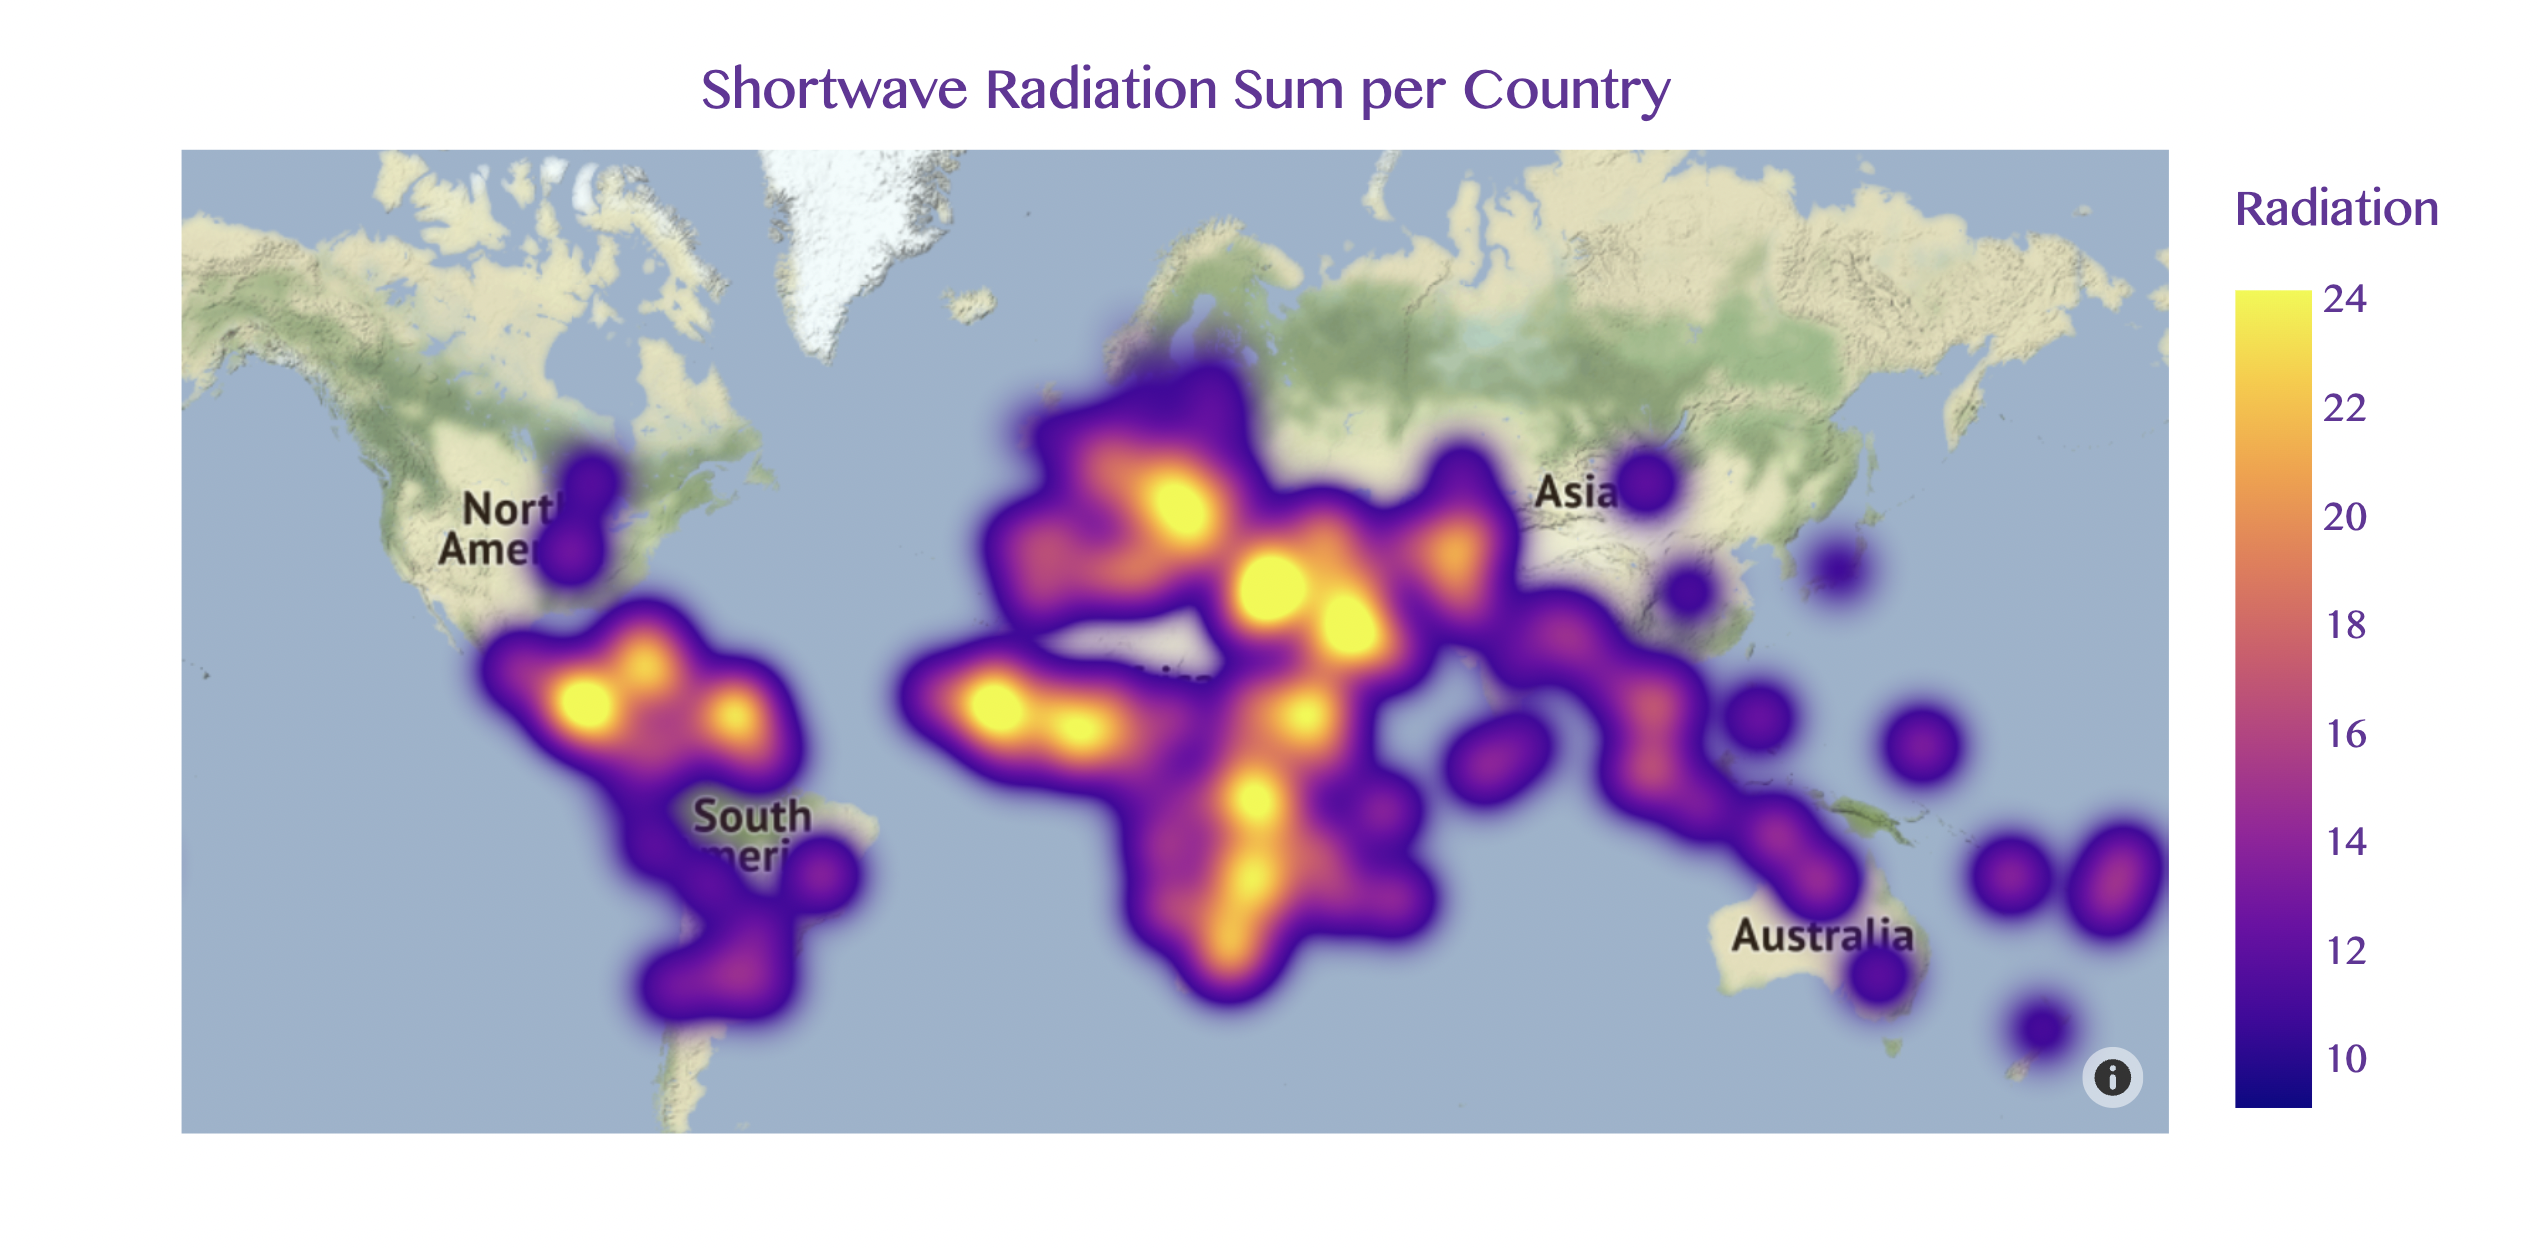

In [3]:
def visual1():
    csv = pd.read_csv('clean_countries.csv')
    with open('avg_api.json') as f:
        data = json.load(f)
    
    swr = [(country, data[country]['shortwave_radiation_sum']) for country in data if data[country]!={}]
    swr = pd.DataFrame(swr, columns =['Country', 'shortwave_radiation_sum'])
    
    df = csv.set_index('Country').join(swr.set_index('Country'))
    
    fig = px.density_mapbox(df, lat='Latitude', lon='Longitude', z='shortwave_radiation_sum', radius=30,
                        center=dict(lat=25, lon=18), zoom=0.62,
                        mapbox_style="stamen-terrain", labels = {'shortwave_radiation_sum': 'Radiation'},
                           )
    fig.update_layout(
    title={
        'text': "Shortwave Radiation Sum per Country",
        'y':0.95,
        'x':0.48,
        'xanchor': 'center',
        'yanchor': 'top'},font=dict(
        family="Khmer MN",
        size=18,
        color="RebeccaPurple"))

    fig.show()

############ Function Call ############
# visual1()

Image("1.png")

#### Visualization 1 Explanation

This code is responsible for showing a map of the average shortwave radiation sum per country. We first read the 'clean_countries.csv', and the 'avg_api.json' file. Then, we created a list of tuples using the data from the JSON file, containing the country, and its shortwave radiation sum. Then, we stored this information in the swr data frame. Afterward, we joined the swr data frame with the clean countries data frame and created a density map from the data using plotly's library, px.density_mapbox(), using the coordinates and the shortwave radiation sum per country.

We wanted to do this to have a visual of the highest shortwave radiation countries. By the side of the graph we can see the radiation bar which represents the levels of shortwave radiation and the colors that represent each range of radiation on top of the map. Countries with the highest shortwave radiation are covered by yellow, orange color. Countries with average radiation rates are colores in a burgundy color and the ones with low radiation rates are colored in purple or blue. With this visualization we can see that that countries near the Equator have higher shortwave radiation. We can also notice that most of Africa and countries in Eastern Europe and the Middle East also have high radiation rates. 


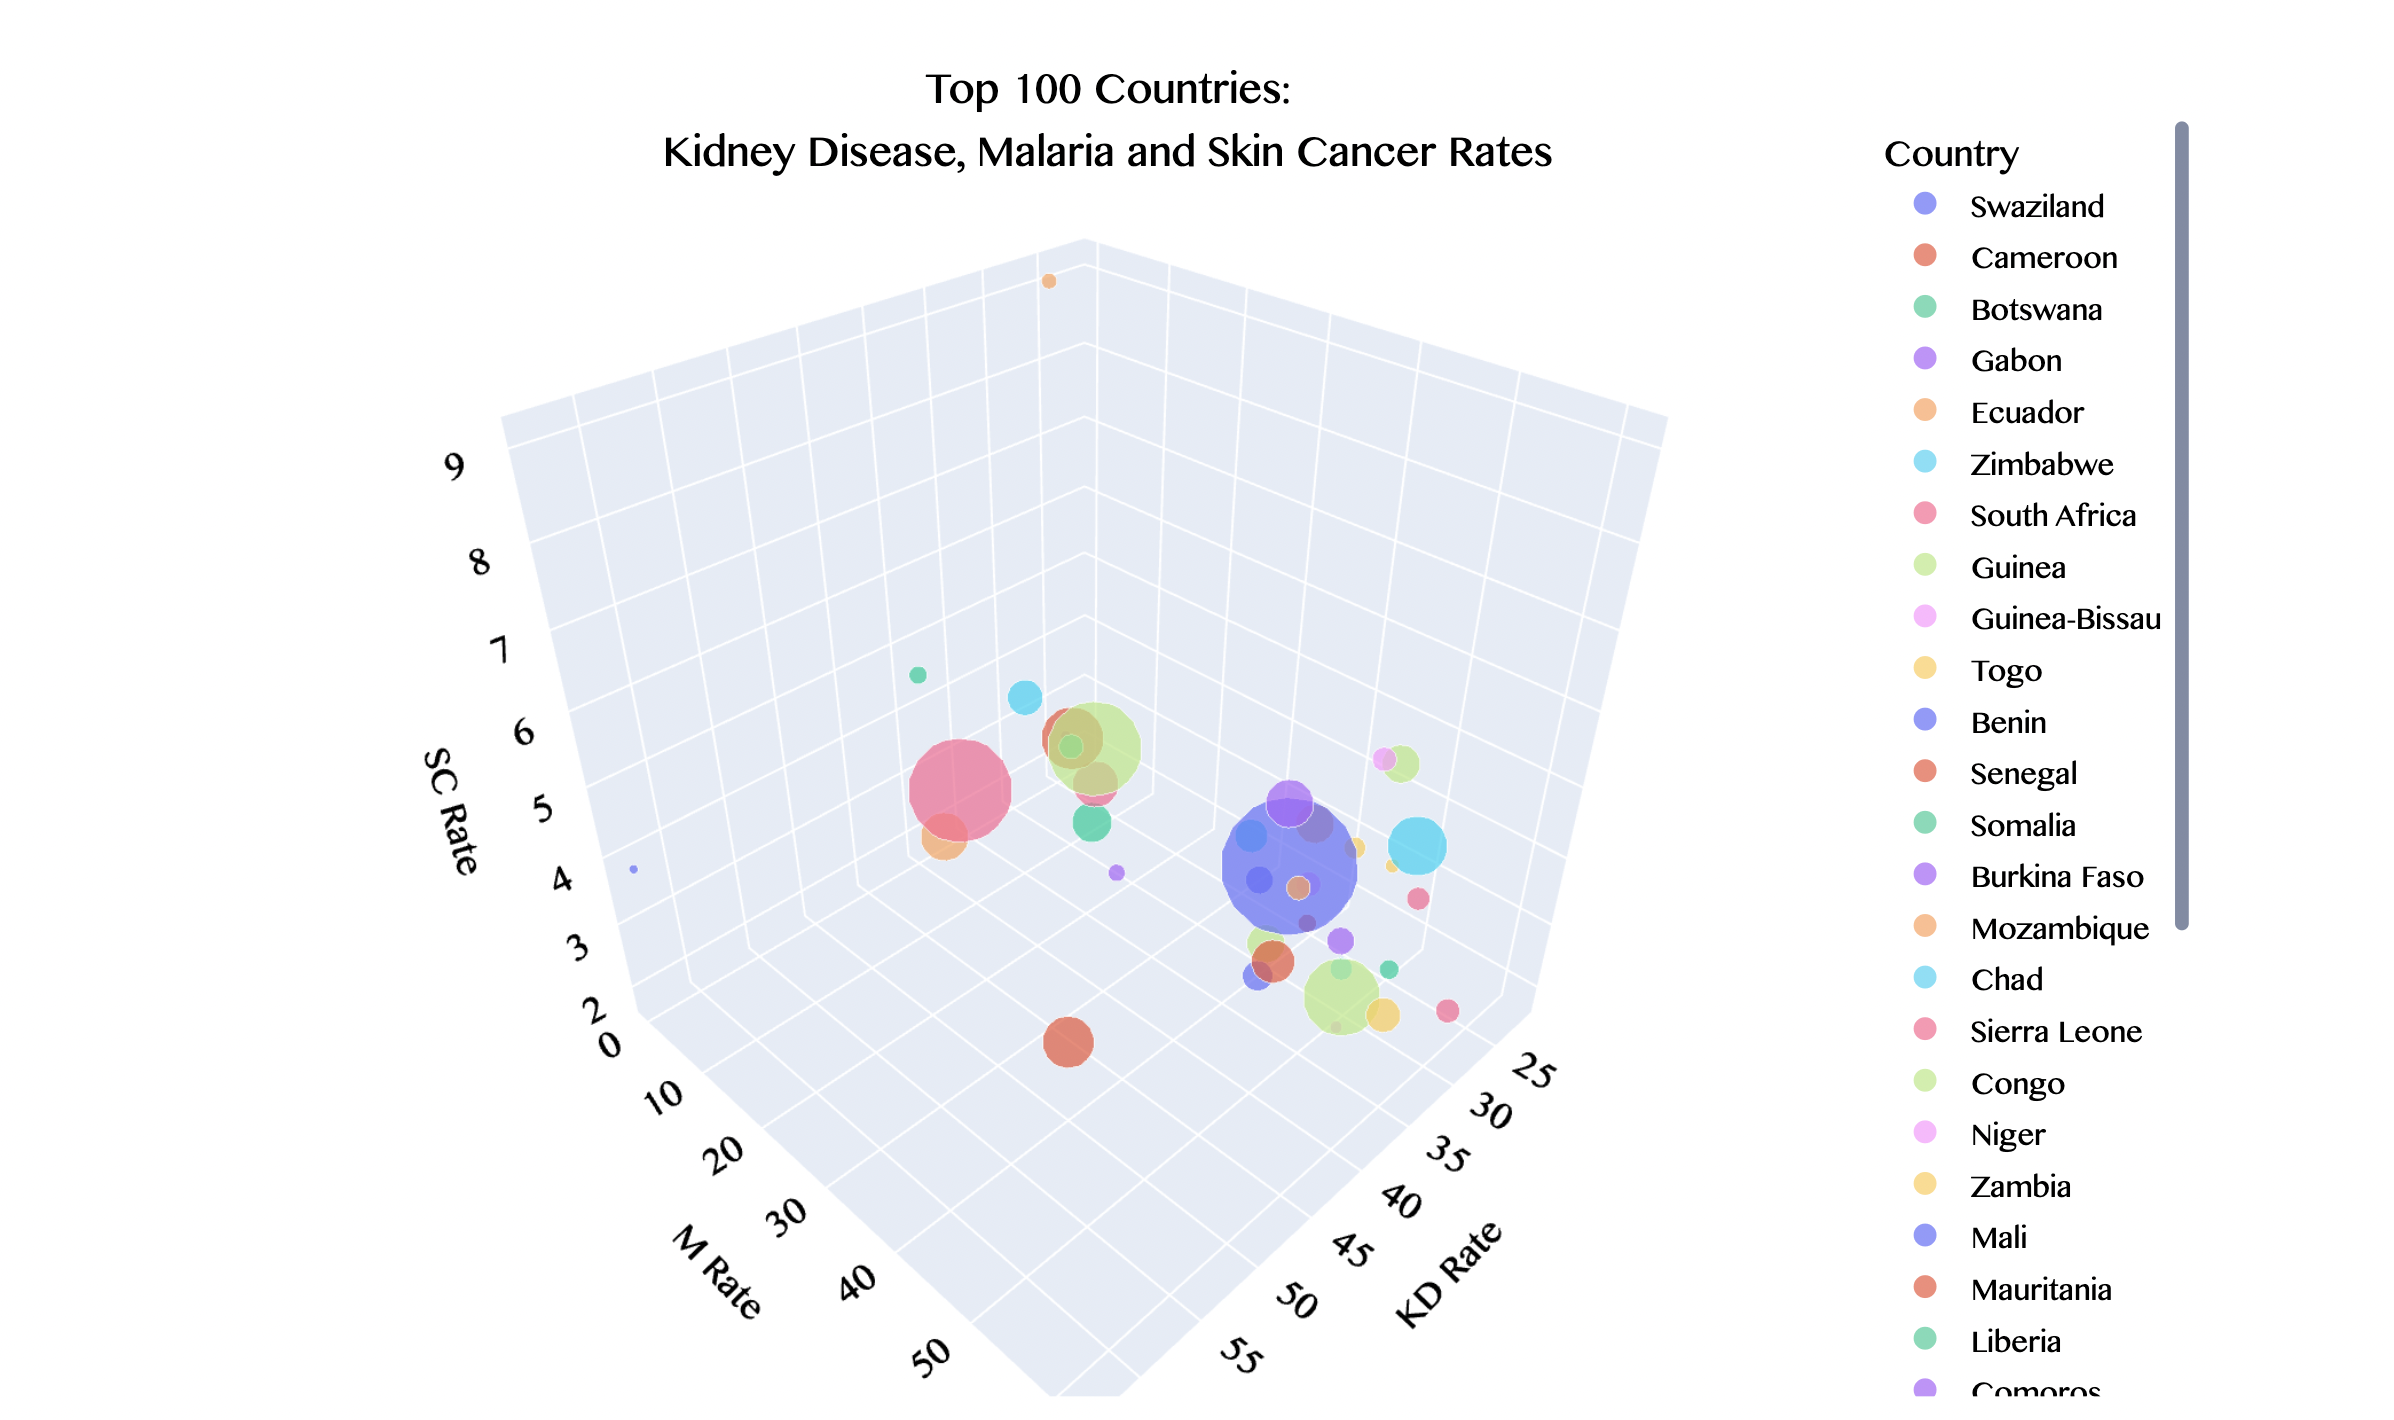

In [7]:
def visual2():
    
    kd = pd.read_excel('Diseases.xlsx', sheet_name = 'Kidney Disease')
    kd.rename(columns = {'Rank': 'KD Rank', 'Rate': 'KD Rate'}, inplace = True)
    m = pd.read_excel('Diseases.xlsx', sheet_name = 'Malaria')
    m.rename(columns = {'Rank': 'M Rank', 'Rate': 'M Rate'}, inplace = True)
    sc = pd.read_excel('Diseases.xlsx', sheet_name = 'Skin Cancer')
    sc.rename(columns = {'Rank': 'SC Rank', 'Rate': 'SC Rate'}, inplace = True)
    
    pop = pd.read_csv('clean_countries.csv')
    pop = pop[['Country', 'Population']]

    df = kd.set_index('Country').join(m.set_index('Country').join(sc.set_index('Country')).join(pop.set_index('Country')))
    
    df = df.dropna(inplace = False, axis = 0).reset_index()
    df = df[df['KD Rank']<=100]
    df = df[df['M Rank']<=100]
    df = df[df['SC Rank']<=100]
    
    fig = px.scatter_3d(df, x='KD Rate', y='M Rate', z='SC Rate',
              color='Country',size = 'Population',size_max=100)
    fig.update_layout(title={'text':'Top 100 Countries:<br>Kidney Disease, Malaria and Skin Cancer Rates',
                             'y':0.92,
                             'x':0.47,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      dragmode='select',
                      width=900,
                      height=700,
                      hovermode='closest',
                      font=dict(
                      family="Khmer MN",
                      size=15,
                      color="black")
                     )
    fig.show()
    
############ Function Call ############
# visual2()

Image("2.png")

#### Visualization 2 Explanation

For our second visualization, we wanted a visual that showed the top 100 countries with higher kidney disease, malaria, and skin cancer rates. The size of the population of each country is symbolized by the size of the circles. The bigger the circle, the more population. With this graph, we can see which countries have higher rates of each of the diseases. For example, we can see that Swaziland has a low Skin Cancer and kidney disease rate, and a high malaria rate. 


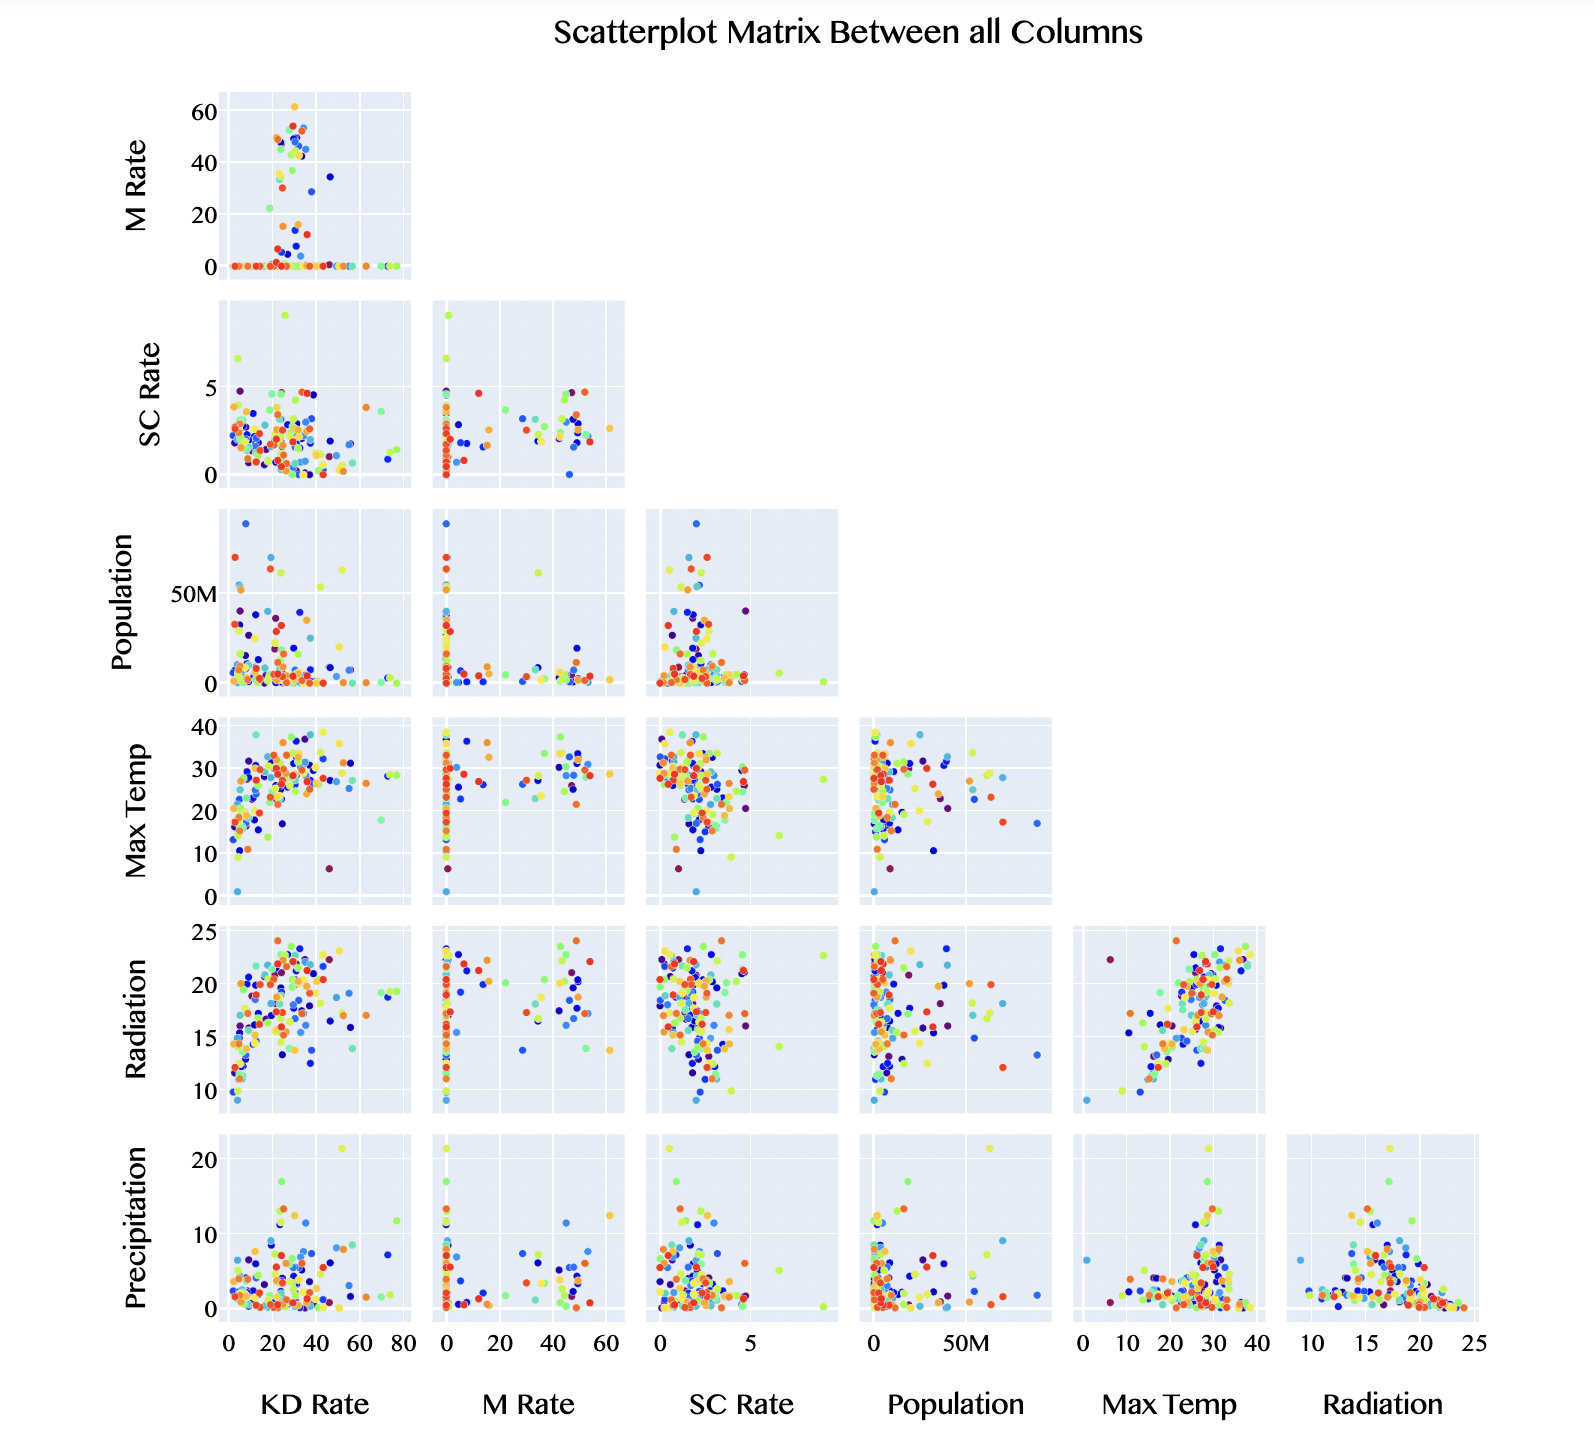

In [8]:
def visual3():
    
    kd = pd.read_excel('Diseases.xlsx', sheet_name = 'Kidney Disease')
    kd = kd[['Country', 'Rate']]
    kd.rename(columns = {'Rate': 'KD Rate'}, inplace = True)
    m = pd.read_excel('Diseases.xlsx', sheet_name = 'Malaria')
    m = m[['Country', 'Rate']]
    m.rename(columns = {'Rate': 'M Rate'}, inplace = True)
    sc = pd.read_excel('Diseases.xlsx', sheet_name = 'Skin Cancer')
    sc = sc[['Country', 'Rate']]
    sc.rename(columns = {'Rate': 'SC Rate'}, inplace = True)
    
    csv = pd.read_csv('clean_countries.csv')
    csv = csv[['Country', 'Population']]
    
    with open('avg_api.json') as f:
        data = json.load(f)
    api_df = pd.DataFrame(data).transpose().reset_index()
    api_df.rename(columns = {'index': 'Country'}, inplace = True)
    
    df = api_df.set_index('Country').join(kd.set_index('Country').join(m.set_index('Country').join(sc.set_index('Country').join(csv.set_index('Country')))))
#     df = pd.read_csv('summary.csv')
    df = df[df['Population']<100000000].reset_index()
    
    fig = go.Figure(data=go.Splom(
                      dimensions=[dict(label='KD Rate', values=df['KD Rate']),
                                  dict(label='M Rate', values=df['M Rate']),
                                  dict(label='SC Rate', values=df['SC Rate']),
                                  dict(label='Population', values=df['Population']),
                                  dict(label='Max Temp', values=df['temperature_2m_max']),
                                  dict(label=' Radiation', values=df['shortwave_radiation_sum']),
                                  dict(label='Precipitation', values=df['precipitation_sum'])],
                      showupperhalf=False,
                      marker=dict(color = [i for i in range(len(df))],
                                  size=5,
                                  colorscale='rainbow',
                                  line=dict(width=0.5,
                                            color='rgb(230,230,230)')),
                      text=df['Country'],
                      diagonal=dict(visible=False)
    ))

    fig.update_layout(title={'text':'Scatterplot Matrix Between all Columns',
                             'y':0.95,
                             'x':0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      dragmode='select',
                      width=1000,
                      height=1000,
                      hovermode='closest',
                      font=dict(
                      family="Khmer MN",
                      size=18,
                      color="black")
                     )


    fig.show()

############ Function Call ############
# visual3()

Image("3.png")

#### Visualization 3 Explanation

For our third visualization, we wanted to bring everything together. Hence, we created a Scatterplot Matrix between all the information. For the rows, we have Malaria Rate, Skin Cancer Rate, Population rate, Max temperature, Radiation, and precipitation. For the columns, we have the Kidney disease, malaria, and skin cancer rates, the population, and max temperatures. We can compare how each of the rows behaves with each of the columns. For example, we can see the graph of max temperature and radiation. With higher radiation, we can see the max temperature is higher. This visualization helps us picture the relationship between everything we have analyzed during this project. 


## Summary Files

In [11]:
def risk(kdrate, mrate, scrate):
    if kdrate>= 25 and mrate>= 10 and scrate>= 3:
        return 'High Risk Country'
    elif kdrate>= 25 and mrate>= 10 or kdrate>= 25 and scrate>= 3 or mrate>= 10 and scrate>= 3:
        return 'Medium Risk Country'
    else:
        return 'Low Risk Country'
    
def summary1():
    with open('avg_api.json') as f:
        data = json.load(f)
    csv = pd.read_csv('clean_countries.csv')
    api_df = pd.DataFrame(data).transpose().reset_index()
    api_df.rename(columns = {'index': 'Country'}, inplace = True)

    new = csv.set_index('Country').join(api_df.set_index('Country')).reset_index()

    kd = pd.read_excel('Diseases.xlsx', sheet_name = 'Kidney Disease')
    m = pd.read_excel('Diseases.xlsx', sheet_name = 'Malaria')
    sc = pd.read_excel('Diseases.xlsx', sheet_name = 'Skin Cancer')

    kd_dict = {i: (kd.loc[i,'Country'],kd.loc[i,'Rate']) for i in range(len(kd))}
    m_dict = {i: (m.loc[i,'Country'], m.loc[i,'Rate']) for i in range(len(m))}
    sc_dict = {i: (sc.loc[i,'Country'],sc.loc[i,'Rate']) for i in range(len(sc))}

    df1 = pd.DataFrame(kd_dict, index = ['Country', 'Kidney Disease Rate']).transpose()
    df2 = pd.DataFrame(m_dict, index = ['Country', 'Malaria Rate']).transpose()
    df3 = pd.DataFrame(sc_dict, index = ['Country', 'Skin Cancer Rate']).transpose()

    df = df1.set_index('Country').join(df2.set_index('Country')).join(df3.set_index('Country')).join(new.set_index('Country'))
    df.rename(columns = {'weathercode': 'Weathercode', 'temperature_2m_max': 'Max Temp.', 'temperature_2m_min':'Min Temp.', 'precipitation_sum':'Precipitation', 'rain_sum':'Rain', 'shortwave_radiation_sum': 'Shortwave Radiation'}, inplace=True)
    
    df['People with Kidney D.'] = df.apply(lambda x: round((x['Kidney Disease Rate']/100) * x['Population'],2), axis=1)
    df['People with Malaria'] = df.apply(lambda x: round((x['Malaria Rate']/100) * x['Population'],2), axis=1)
    df['People with Skin Cancer'] = df.apply(lambda x: round((x['Skin Cancer Rate']/100) * x['Population'],2), axis=1)

    df['Risk Evaluation'] = df.apply(lambda x: risk(x["Kidney Disease Rate"], x["Malaria Rate"], x["Skin Cancer Rate"]), axis = 1)
    
    df.to_csv('summary.csv')
    
    return(df)

############ Function Call ############
summary1()

Kidney Disease Rate Malaria Rate Skin Cancer Rate  Population  \
Country                                                                        
Micronesia                   77.01          0.0             1.43     45125.0   
Nicaragua                    73.96          0.0             1.27   3029006.0   
El Salvador                   72.9          0.0             0.88   2951847.0   
Lesotho                      69.87          0.0             3.61    382042.0   
Swaziland                    62.97         0.02             3.84    276340.0   
...                            ...          ...              ...         ...   
United Kingdom                2.86          0.0             2.62  70185008.0   
Ukraine                       2.72          0.0              2.7  32847337.0   
Belarus                        2.7          0.0             1.81   7097388.0   
Slovenia                      2.34          0.0             3.86   1197883.0   
Finland                       2.05          0.0             2.23   5856320.0   

                Latitude  Longitude  Weathercode  Max Temp.  Min Temp.  \
Country                                                                  
Micronesia       6.96247  151.92687        82.78      28.48      27.61   
Nicaragua       12.60916  -85.87203        32.58      28.65      21.73   
El Salvador     13.68704  -88.91846        77.65      28.29      21.42   
Lesotho        -29.49223   27.99770        29.08      17.89       6.34   
Swaziland      -26.51490   31.44404        27.06      26.57      14.23   
...                  ...        ...          ...        ...        ...   
United Kingdom  52.87165   -1.87258        37.07      17.44       9.94   
Ukraine         47.89951   30.79562          NaN        NaN        NaN   
Belarus         53.57426   27.81115        36.52      16.30       8.52   
Slovenia        46.22262   14.98560        41.59      20.62      12.39   
Finland         62.24682   24.91347        46.62      13.29       7.04   

                Precipitation  Rain  Shortwave Radiation  \
Country                                                    
Micronesia              11.69  0.14                19.33   
Nicaragua                1.75  0.30                19.31   
El Salvador              7.11  0.35                18.78   
Lesotho                  1.49  0.24                19.22   
Swaziland                1.45  0.13                17.07   
...                       ...   ...                  ...   
United Kingdom           1.52  0.87                12.15   
Ukraine                   NaN   NaN                  NaN   
Belarus                  1.72  0.89                11.63   
Slovenia                 3.54  2.52                14.36   
Finland                  2.28  0.69                 9.82   

                People with Kidney D.  People with Malaria  \
Country                                                      
Micronesia                   34750.76                 0.00   
Nicaragua                  2240252.84                 0.00   
El Salvador                2151896.46                 0.00   
Lesotho                     266932.75                 0.00   
Swaziland                   174011.30                55.27   
...                               ...                  ...   
United Kingdom             2007291.23                 0.00   
Ukraine                     893447.57                 0.00   
Belarus                     191629.48                 0.00   
Slovenia                     28030.46                 0.00   
Finland                     120054.56                 0.00   

                People with Skin Cancer      Risk Evaluation  
Country                                                       
Micronesia                       645.29     Low Risk Country  
Nicaragua                      38468.38     Low Risk Country  
El Salvador                    25976.25     Low Risk Country  
Lesotho                        13791.72  Medium Risk Country  
Swaziland                      10611.46  Medi

## Cited Sources

*   https://plotly.com/python/mapbox-density-heatmaps/
*   https://plotly.com/python/3d-scatter-plots/
*   https://plotly.com/python/splom/


## Video Presentation

*   Video Presentation Link: https://youtu.be/PqXEHN0grTg
